# Import libraries

In [97]:
import pandas as pd

In [98]:
import numpy as np

In [99]:
import matplotlib.pyplot as plt

In [100]:
import seaborn as sns

In [101]:
import mllib

In [102]:
import time

# Import dataset

Import and read dataset:

In [103]:
trainingData = pd.read_csv('csv/cleaned/trainingData_clean.csv',index_col=0)

In [104]:
validationData = pd.read_csv('csv/validationData.csv')

In [105]:
X_train = pd.read_csv('csv/transformed/X_train.csv',index_col=0)

In [106]:
X_test = pd.read_csv('csv/transformed/X_test.csv',index_col=0)

In [107]:
X_val = pd.read_csv('csv/transformed/X_val.csv',index_col=0)

# Predict building_floor

## Create new feature

To predict building and floor lets define a unique number, that has  building and floor in it:

In [108]:
trainingData['building_floor'] = trainingData['BUILDINGID']*10 + trainingData['FLOOR']

In [109]:
validationData['building_floor'] = validationData['BUILDINGID']*10 + validationData['FLOOR']

For example: 23 is building 2, floor 3

## Define target

In [110]:
y_train = list(trainingData.loc[X_train.index,['building_floor']]['building_floor'])

In [111]:
y_test = list(trainingData.loc[X_test.index,['building_floor']]['building_floor'])

In [112]:
y_val = list(validationData.loc[X_val.index,['building_floor']]['building_floor'])

## Decision tree

In [113]:
# collect accuracy of models
accuracy_train = {}
accuracy_test = {}
accuracy_val = {}
perfomance_time_cl = {}

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
tree = DecisionTreeClassifier(min_samples_leaf = 13,
                              max_depth = 45,
                              random_state=42)

In [116]:
start = time.time()
tree.fit(X_train, y_train)
stop = time.time()
perfomance_time_cl['DT'] = stop - start

<AxesSubplot:>

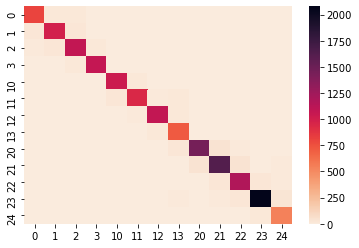

In [117]:
# train
acc_scor = mllib.model_check(y_train, tree.predict(X_train), tree)
accuracy_train['DT'] = acc_scor
sns.heatmap(mllib.model_check(y_train, 
                              tree.predict(X_train), 
                              tree, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

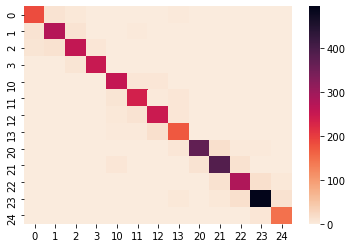

In [118]:
# test
acc_scor = mllib.model_check(y_test, tree.predict(X_test), tree)
accuracy_test['DT'] = acc_scor
sns.heatmap(mllib.model_check(y_test, 
                              tree.predict(X_test), 
                              tree, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

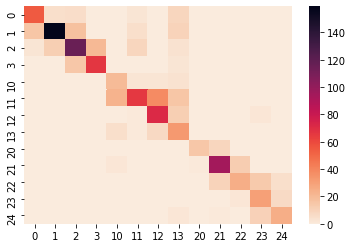

In [119]:
# val
acc_scor = mllib.model_check(y_val, tree.predict(X_val), tree)
accuracy_val['DT'] = acc_scor
mllib.model_check(y_val, tree.predict(X_val), tree, output ='cmatrix')
sns.heatmap(mllib.model_check(y_val, 
                              tree.predict(X_val), 
                              tree, 
                              output ='cmatrix'),
           cmap='rocket_r')

## Knearest neighbors

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4,
                           weights='distance')


In [121]:
start = time.time()
knn.fit(X_train, y_train)
stop = time.time()
perfomance_time_cl['KNN'] = stop - start

<AxesSubplot:>

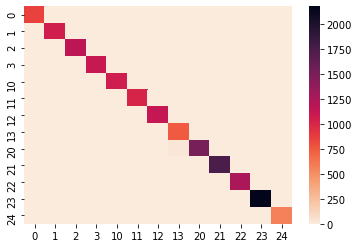

In [122]:
# train 
acc_scor = mllib.model_check(y_train, knn.predict(X_train), knn)
accuracy_train['KNN'] = acc_scor
sns.heatmap(mllib.model_check(y_train, 
                              knn.predict(X_train), 
                              knn, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

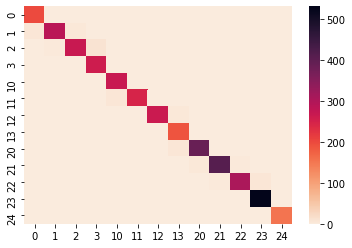

In [123]:
# test
acc_scor = mllib.model_check(y_test, knn.predict(X_test), knn)
accuracy_test['KNN'] = acc_scor
sns.heatmap(mllib.model_check(y_test, 
                              knn.predict(X_test), 
                              knn, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

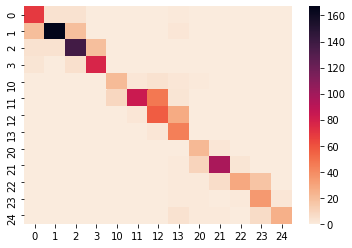

In [124]:
# val
acc_scor = mllib.model_check(y_val, knn.predict(X_val), knn)
accuracy_val['KNN'] = acc_scor
sns.heatmap(mllib.model_check(y_val, 
                              knn.predict(X_val), 
                              knn, 
                              output ='cmatrix'),
           cmap='rocket_r')

## Logistic regression

Performs slow with big number of categories (for example building-floor)

In [125]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=1000)


In [126]:
start = time.time()
lg.fit(X_train, y_train)
stop = time.time()
perfomance_time_cl['LR'] = stop - start

<AxesSubplot:>

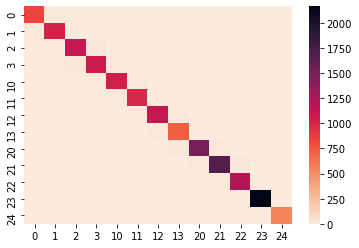

In [127]:
# train
acc_scor = mllib.model_check(y_train, lg.predict(X_train), lg)
accuracy_train['LR'] = acc_scor
sns.heatmap(mllib.model_check(y_train, 
                              lg.predict(X_train), 
                              lg, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

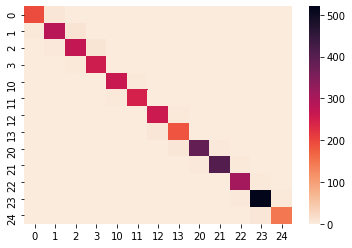

In [128]:
# test
acc_scor = mllib.model_check(y_test, lg.predict(X_test), lg)
accuracy_test['LR'] = acc_scor
sns.heatmap(mllib.model_check(y_test, 
                              lg.predict(X_test), 
                              lg, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

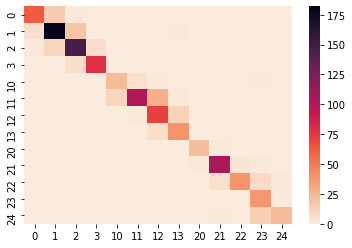

In [129]:
# val
acc_scor = mllib.model_check(y_val, lg.predict(X_val), lg)
accuracy_val['LR'] = acc_scor
sns.heatmap(mllib.model_check(y_val, 
                              lg.predict(X_val), 
                              lg, 
                              output ='cmatrix'),
           cmap='rocket_r')

## Random forest

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
rf = RandomForestClassifier(n_estimators=19,
                            max_features =8,
                            max_depth=26, 
                            random_state=42)


In [132]:
start = time.time()
rf.fit(X_train, y_train)
stop = time.time()
perfomance_time_cl['RF'] = stop - start

<AxesSubplot:>

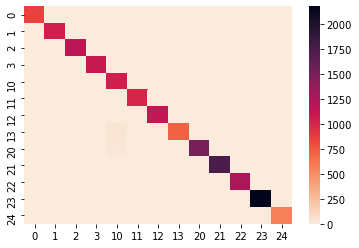

In [133]:
# train
acc_scor = mllib.model_check(y_train, rf.predict(X_train), rf)
accuracy_train['RF'] = acc_scor
sns.heatmap(mllib.model_check(y_train, 
                              rf.predict(X_train), 
                              rf, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

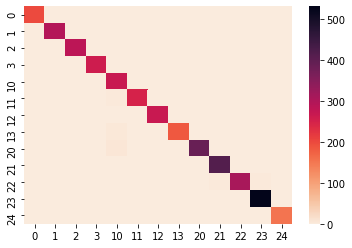

In [134]:
# test
acc_scor = mllib.model_check(y_test, rf.predict(X_test), rf)
accuracy_test['RF'] = acc_scor
sns.heatmap(mllib.model_check(y_test, 
                              rf.predict(X_test), 
                              rf, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

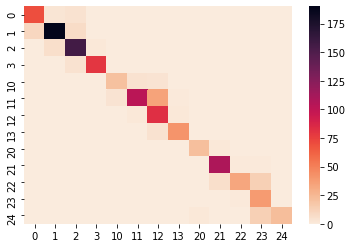

In [135]:
# val
acc_scor = mllib.model_check(y_val, rf.predict(X_val), rf)
accuracy_val['RF'] = acc_scor
sns.heatmap(mllib.model_check(y_val, 
                              rf.predict(X_val), 
                              rf, 
                              output ='cmatrix'),
           cmap='rocket_r')

## Support Vector Machine

Performs slow with big number of categories (for example building-floor)

In [136]:
from sklearn.svm import SVC

In [137]:
svm = SVC(kernel='rbf')

In [138]:
start = time.time()
svm.fit(X_train, y_train)
stop = time.time()
perfomance_time_cl['SVM'] = stop - start

<AxesSubplot:>

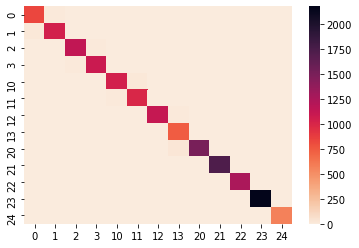

In [139]:
# train
acc_scor = mllib.model_check(y_train, svm.predict(X_train), svm)
accuracy_train['SVM'] = acc_scor
sns.heatmap(mllib.model_check(y_train, 
                              svm.predict(X_train), 
                              svm, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

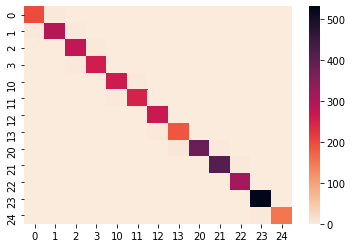

In [140]:
# test
acc_scor = mllib.model_check(y_test, svm.predict(X_test), svm)
accuracy_test['SVM'] = acc_scor
sns.heatmap(mllib.model_check(y_test, 
                              svm.predict(X_test), 
                              svm, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

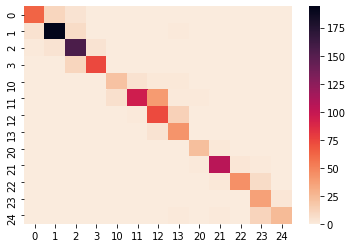

In [141]:
# val
acc_scor = mllib.model_check(y_val, svm.predict(X_val), svm)
accuracy_val['SVM'] = acc_scor
sns.heatmap(mllib.model_check(y_val, 
                              svm.predict(X_val), 
                              svm, 
                              output ='cmatrix'),
           cmap='rocket_r')

## COMPARE accuracy of models

In [142]:
accuracy_df = pd.DataFrame({'accuracy':accuracy_train.values(),'set':['train']*len(accuracy_train),'model':accuracy_train.keys()})
accuracy_df_test = pd.DataFrame({'accuracy':accuracy_test.values(),'set':['test']*len(accuracy_test),'model':accuracy_test.keys()})
accuracy_df_val = pd.DataFrame({'accuracy':accuracy_val.values(),'set':['val']*len(accuracy_val),'model':accuracy_val.keys()})
accuracy_df = accuracy_df.append([accuracy_df_test,accuracy_df_val],ignore_index=True)

In [143]:
accuracy_df

,accuracy,set,model
0,0.948249,train,DT
1,0.997990,train,KNN
2,0.977951,train,LR
3,0.995266,train,RF
4,0.989040,train,SVM
5,0.924793,test,DT
6,0.979253,test,KNN
7,0.968620,test,LR
8,0.991701,test,RF
9,0.985737,test,SVM


## COMPARE perfomance (time) of models

In [144]:
perfomance_time_cl_df = pd.DataFrame( {'model':perfomance_time_cl.keys(),'train_time':perfomance_time_cl.values()} )
perfomance_time_cl_df

,model,train_time
0,DT,0.392229
1,KNN,0.011076
2,LR,3.308157
3,RF,0.350545
4,SVM,7.533394


## Export results

In [145]:
accuracy_df.to_csv('csv/visualization/accuracy_df.csv')
perfomance_time_cl_df.to_csv('csv/visualization/perfomance_time_cl_df.csv')

# Predict longitude, lattitude

In [146]:
from sklearn.metrics import mean_squared_error, r2_score

In [147]:
regression_models = pd.DataFrame(columns=['target','model','dataset','mean_squared_error','r2_score'])

## LONGITUDE

### Define target

In [148]:
y_train = list(trainingData.loc[X_train.index,['LONGITUDE']]['LONGITUDE'])
y_test = list(trainingData.loc[X_test.index,['LONGITUDE']]['LONGITUDE'])
y_val = list(validationData.loc[X_val.index,['LONGITUDE']]['LONGITUDE'])

### Random Forest Regression

In [149]:
from sklearn.ensemble import RandomForestRegressor

In [150]:
rfr_long = RandomForestRegressor(n_estimators = 9, max_features = 26, max_depth = 28, random_state=42)


In [151]:
start = time.time()
rfr_long.fit(X_train,y_train)
stop = time.time()
train_time = stop - start

In [152]:
# Predict LONGITUDE for test dataset
y_pred = rfr_long.predict(X_test)

In [153]:
# test
temp_df = pd.DataFrame({'target':['LONGITUDE'],
                        'model':['RFR'],
                        'dataset':'test',
                        'mean_squared_error':mean_squared_error(y_test, y_pred),
                        'r2_score':r2_score(y_test, y_pred),
                        'train_time': train_time})

regression_models = regression_models.append(temp_df,ignore_index=True)

In [154]:
# validation
y_pred = rfr_long.predict(X_val)
temp_df = pd.DataFrame({'target':['LONGITUDE'],
                        'model':['RFR'],
                        'dataset':'val',
                        'mean_squared_error':mean_squared_error(y_val, y_pred),
                        'r2_score':r2_score(y_val, y_pred),
                        'train_time': train_time})
regression_models = regression_models.append(temp_df,ignore_index=True)

### KNN Regression

In [155]:
from sklearn.neighbors import KNeighborsRegressor

In [156]:
knnr_long = KNeighborsRegressor(n_neighbors=3)


In [157]:
start = time.time()
knnr_long.fit(X_train,y_train)
stop = time.time()
train_time = stop - start

In [158]:
# Predict LONGITUDE for test dataset
y_pred = knnr_long.predict(X_test)

In [159]:
# the mean squared error and
# the coefficient of determination: 1 is perfect prediction
temp_df = pd.DataFrame({'target':['LONGITUDE'],
                        'model':['KNNR'],
                        'dataset':'test',
                        'mean_squared_error':mean_squared_error(y_test, y_pred),
                        'r2_score':r2_score(y_test, y_pred),
                        'train_time': train_time})


regression_models = regression_models.append(temp_df,ignore_index=True)

In [160]:
# validation
y_pred = knnr_long.predict(X_val)
temp_df = pd.DataFrame({'target':['LONGITUDE'],
                        'model':['KNNR'],
                        'dataset':'val',
                        'mean_squared_error':mean_squared_error(y_val, y_pred),
                        'r2_score':r2_score(y_val, y_pred),
                        'train_time': train_time})
regression_models = regression_models.append(temp_df,ignore_index=True)

### Decision tree Regression

In [161]:
from sklearn.tree import DecisionTreeRegressor

In [162]:
dtr_long = DecisionTreeRegressor(max_depth=27,
                                 min_samples_leaf=2, 
                                 random_state=42)


In [163]:
start = time.time()
dtr_long.fit(X_train,y_train)
stop = time.time()
train_time = stop - start

In [164]:
# Predict LONGITUDE for test dataset
y_pred = dtr_long.predict(X_test)

In [165]:
# the mean squared error and
# the coefficient of determination: 1 is perfect prediction
temp_df = pd.DataFrame({'target':['LONGITUDE'],
                        'model':['DTR'],
                        'dataset':'test',
                        'mean_squared_error':mean_squared_error(y_test, y_pred),
                        'r2_score':r2_score(y_test, y_pred),
                        'train_time': train_time})

regression_models = regression_models.append(temp_df,ignore_index=True)

In [166]:
# validation
y_pred = dtr_long.predict(X_val)
temp_df = pd.DataFrame({'target':['LONGITUDE'],
                        'model':['DTR'],
                        'dataset':'val',
                        'mean_squared_error':mean_squared_error(y_val, y_pred),
                        'r2_score':r2_score(y_val, y_pred),
                        'train_time': train_time})
regression_models = regression_models.append(temp_df,ignore_index=True)

## LATITUDE

### Define target

In [167]:
y_train = list(trainingData.loc[X_train.index,['LATITUDE']]['LATITUDE'])
y_test = list(trainingData.loc[X_test.index,['LATITUDE']]['LATITUDE'])
y_val = list(validationData.loc[X_val.index,['LATITUDE']]['LATITUDE'])

### Random Forest Regression

In [168]:
rfr_lat = RandomForestRegressor(n_estimators=15,
                                max_features=27,
                                max_depth = 29,
                                random_state=42)

In [169]:
start = time.time()
rfr_lat.fit(X_train,y_train)
stop = time.time()
train_time = stop - start

In [170]:
# Predict LONGITUDE for test dataset
y_pred = rfr_lat.predict(X_test)

In [171]:
# the mean squared error and
# the coefficient of determination: 1 is perfect prediction

temp_df = pd.DataFrame({'target':['LATITUDE'],
                        'model':['RFR'],
                        'dataset':'test',
                        'mean_squared_error':mean_squared_error(y_test, y_pred),
                        'r2_score':r2_score(y_test, y_pred),
                        'train_time': train_time})
regression_models = regression_models.append(temp_df,ignore_index=True)

In [172]:
# validation
y_pred = rfr_lat.predict(X_val)
temp_df = pd.DataFrame({'target':['LATITUDE'],
                        'model':['RFR'],
                        'dataset':'val',
                        'mean_squared_error':mean_squared_error(y_val, y_pred),
                        'r2_score':r2_score(y_val, y_pred),
                        'train_time': train_time})
regression_models = regression_models.append(temp_df,ignore_index=True)

### KNN Regression

In [173]:
from sklearn.neighbors import KNeighborsRegressor

In [174]:
knnr_lat = KNeighborsRegressor(n_neighbors=2,weights='uniform')

In [175]:
start = time.time()
knnr_lat.fit(X_train,y_train)
stop = time.time()
train_time = stop - start

In [176]:
# the mean squared error and
# the coefficient of determination: 1 is perfect prediction
temp_df = pd.DataFrame({'target':['LATITUDE'],
                        'model':['KNNR'],
                        'dataset':'test',
                        'mean_squared_error':mean_squared_error(y_val, y_pred),
                        'r2_score':r2_score(y_val, y_pred),
                        'train_time': train_time})

regression_models = regression_models.append(temp_df,ignore_index=True)

In [177]:
# validation
y_pred = knnr_lat.predict(X_val)
temp_df = pd.DataFrame({'target':['LATITUDE'],
                        'model':['KNNR'],
                        'dataset':'val',
                        'mean_squared_error':mean_squared_error(y_val, y_pred),
                        'r2_score':r2_score(y_val, y_pred),
                        'train_time': train_time})
regression_models = regression_models.append(temp_df,ignore_index=True)

### Decision tree Regression

In [178]:
from sklearn.tree import DecisionTreeRegressor

In [179]:
dtr_lat = DecisionTreeRegressor(max_depth=25,
                                min_samples_leaf=2,
                                random_state=42)

In [180]:
start = time.time()
dtr_lat.fit(X_train, y_train)
stop = time.time()
train_time = stop - start

In [181]:
# Predict LONGITUDE for test dataset
y_pred = dtr_lat.predict(X_test)

In [182]:
# the mean squared error and
# the coefficient of determination: 1 is perfect prediction
temp_df = pd.DataFrame({'target':['LATITUDE'],
                        'model':['DTR'],
                        'dataset':'test',
                        'mean_squared_error':mean_squared_error(y_test, y_pred),
                        'r2_score':r2_score(y_test, y_pred),
                        'train_time': train_time})

regression_models = regression_models.append(temp_df,ignore_index=True)

In [183]:
# validation
y_pred = dtr_lat.predict(X_val)
temp_df = pd.DataFrame({'target':['LATITUDE'],
                        'model':['DTR'],
                        'dataset':'val',
                        'mean_squared_error':mean_squared_error(y_val, y_pred),
                        'r2_score':r2_score(y_val, y_pred),
                        'train_time': train_time})
regression_models = regression_models.append(temp_df,ignore_index=True)

## COMPARE MSE, R2

In [184]:
regression_models.style.format({
    "mean_squared_error":  "{:.2f}",
    "r2_score": "{:.2f}"
})
regression_models

,target,model,dataset,mean_squared_error,r2_score,train_time
0,LONGITUDE,RFR,test,106.979648,0.993163,0.445050
1,LONGITUDE,RFR,val,242.498457,0.983203,0.445050
2,LONGITUDE,KNNR,test,68.698855,0.995610,0.016027
3,LONGITUDE,KNNR,val,269.667140,0.981321,0.016027
4,LONGITUDE,DTR,test,143.143924,0.990852,0.442545
5,LONGITUDE,DTR,val,403.856374,0.972027,0.442545
6,LATITUDE,RFR,test,45.684249,0.989857,0.739768
7,LATITUDE,RFR,val,145.078327,0.970595,0.739768
8,LATITUDE,KNNR,test,145.078327,0.970595,0.013495
9,LATITUDE,KNNR,val,199.902388,0.959483,0.013495


In [185]:
regression_models.to_csv('csv/visualization/regression_models.csv')

## Predicted positions vs actual positions

### Train data

In [186]:
longitude_actual = list(trainingData.loc[X_train.index,['LONGITUDE']]['LONGITUDE'])
lattitude_actual = list(trainingData.loc[X_train.index,['LATITUDE']]['LATITUDE'])
longitude_predicted = rfr_long.predict(X_train)
lattitude_predicted = rfr_lat.predict(X_train)

positions_df_actual = pd.DataFrame({'LONGITUDE':longitude_actual,
                                    'LATITUDE':lattitude_actual}).reset_index()
positions_df_actual.index = X_train.index

positions_df_pred = pd.DataFrame({'LONGITUDE':longitude_predicted,
                                  'LATITUDE':lattitude_predicted}).reset_index()
positions_df_pred.index = X_train.index

In [187]:
positions_df_actual.to_csv('csv/visualization/positions_df_actual_train.csv')
positions_df_pred.to_csv('csv/visualization/positions_df_pred_train.csv')

### Test data

In [188]:
longitude_actual = list(trainingData.loc[X_test.index,['LONGITUDE']]['LONGITUDE'])
lattitude_actual = list(trainingData.loc[X_test.index,['LATITUDE']]['LATITUDE'])
longitude_predicted = rfr_long.predict(X_test)
lattitude_predicted = rfr_lat.predict(X_test)

positions_df_actual = pd.DataFrame({'LONGITUDE':longitude_actual,
                                    'LATITUDE':lattitude_actual}).reset_index()
positions_df_actual.index = X_test.index

positions_df_pred = pd.DataFrame({'LONGITUDE':longitude_predicted,
                                  'LATITUDE':lattitude_predicted}).reset_index()
positions_df_pred.index = X_test.index

In [189]:
positions_df_actual.to_csv('csv/visualization/positions_df_actual_test.csv')
positions_df_pred.to_csv('csv/visualization/positions_df_pred_test.csv')

### Validation data

In [190]:
longitude_actual = list(validationData.loc[X_val.index,['LONGITUDE']]['LONGITUDE'])
lattitude_actual = list(validationData.loc[X_val.index,['LATITUDE']]['LATITUDE'])
longitude_predicted = rfr_long.predict(X_val)
lattitude_predicted = rfr_lat.predict(X_val)

positions_df_actual = pd.DataFrame({'LONGITUDE':longitude_actual,
                                    'LATITUDE':lattitude_actual}).reset_index()
positions_df_actual.index = X_val.index

positions_df_pred = pd.DataFrame({'LONGITUDE':longitude_predicted,
                                  'LATITUDE':lattitude_predicted}).reset_index()
positions_df_pred.index = X_val.index

In [191]:
positions_df_actual.to_csv('csv/visualization/positions_df_actual_val.csv')
positions_df_pred.to_csv('csv/visualization/positions_df_pred_val.csv')